# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [1]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp
import join as jo

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [4]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labelled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [ ]:
df = pd.read_csv(data_dir+'lab/input.txt', sep='\t', encoding='utf-8')
df.columns

Index(['label', 'text', 'tag'], dtype='object')

## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

In [ ]:
%%time

ul = main.Main('lab', debug_iter_id=0)

[INFO] **** ITERATION # 0 ****
[INFO] Input Length -> 9245
[INFO] Label Summary: 
Web              77
Panorama         73
International    68
Sport            64
Wirtschaft       63
Inland           47
Etat             42
Wissenschaft     40
Kultur           26
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 9244

[INFO] Estimating complexity using SUPERVISED approach.
	[INFO] Data available for training -> 500


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.67      0.71      0.69        14
           2       0.73      0.62      0.67        13
           3       0.71      1.00      0.83        12
           4       0.88      0.58      0.70        12
           5       0.86      0.67      0.75         9
           6       1.00      0.62      0.77         8
           7       0.58      0.88      0.70         8
           8       0.67      0.80      0.73         5

   micro avg       0.73      0.73      0.73        96
   macro avg       0.76      0.73      0.73        96
weighted avg       0.75      0.73      0.73        96

	[INFO] Complexity Score -> 0.7270112849315437

[INFO] Applying model to data


In [ ]:
%%time

ul = main.Main('tal', debug_iter_id=0)

In [208]:
%%time

ul = main.Main('tal', debug_iter_id=1)

[INFO] **** ITERATION # 1 ****
[INFO] Loading splits from iteration 0.
	[INFO] Quality Score of Labeler 1 -> 0.0625
	[INFO] Quality Score of Labeler 2 -> 0.0
[INFO] Input Length -> 3806
[INFO] Label Summary: 
documentDate       802
damageDate          92
gracePeriodDate     67
None                24
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806

[INFO] Estimating complexity using SUPERVISED approach.
	[INFO] Data available for training -> 3806


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.74      0.98      0.85       564
           1       0.31      0.03      0.05       160
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4

   micro avg       0.74      0.74      0.74       759
   macro avg       0.21      0.20      0.18       759
weighted avg       0.62      0.74      0.64       759



C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Score -> 0.6387290247664161

[INFO] Applying model to data
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_1.xlsx
    262
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_1-split_2.xlsx
                240
documentDate      2
Name: pred, dtype: int64
Wall time: 5.76 s


In [252]:
%%time

ul = main.Main('tal', debug_iter_id=1)

[INFO] **** ITERATION # 1 ****
[INFO] Loading splits from iteration 0.
	[INFO] Quality Score of Labeler 1 -> 0.0625
	[INFO] Quality Score of Labeler 2 -> 0.0
[INFO] Input Length -> 3806
[INFO] Label Summary: 
documentDate       802
damageDate          92
gracePeriodDate     67
None                24
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806

[INFO] Estimating complexity using SUPERVISED approach.
	[INFO] Data available for training -> 3806


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       564
           1       0.40      0.25      0.31       160
           2       0.75      0.17      0.27        18
           3       0.38      0.23      0.29        13
           4       0.50      0.25      0.33         4

   micro avg       0.72      0.72      0.72       759
   macro avg       0.56      0.36      0.40       759
weighted avg       0.68      0.72      0.69       759

	[INFO] Complexity Score -> 0.690406749802699

[INFO] Applying model to data
[[0.9361741  0.0638259  0.         0.         0.        ]
 [0.60835684 0.39164316 0.         0.         0.        ]
 [0.60835684 0.39164316 0.         0.         0.        ]
 ...
 [0.9361741  0.0638259  0.         0.         0.        ]
 [0.9361741  0.0638259  0.         0.         0.        ]
 [0.9361741  0.0638259  0.         0.         0.        ]]
[[ 0.32781726 -0.32781726  0.          0

In [216]:
import numpy as np

In [226]:
a = [1, 2, 3]
b = [3, 2, 1]
c = np.array([a, b])

In [235]:
c[:,0]

array([1, 3])

In [241]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
np.subtract(x1, x2)

array([[0., 0., 0.],
       [3., 3., 3.],
       [6., 6., 6.]])

In [243]:
x2

array([0., 1., 2.])

In [244]:
print(c[:,0] -c[:,1])

[-1  1]


## Estimate Complexity


[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

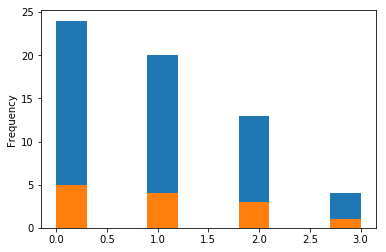

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

## Determine Split
Overlap

In [38]:
sp.calculate_split(3806, 0.73, 10)

(10, 0.27)

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

## Join

In [182]:
t1, t2, t3 = jo.load_splits(data_dir + 'tal/', 0)

16
	[INFO] Quality Score of Labeler 1 -> 0.0625
16
	[INFO] Quality Score of Labeler 2 -> 0.0


In [184]:
tc = jo.join_splits(t1, t2)

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  